In [ ]:
import pandas as pd
import numpy as np

#For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Machine learning model
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

In [ ]:
!gdown https://drive.google.com/uc?id=1DwfvBmlaEERTSPkHxuGy-grq2Ds1fwH5

df = pd.read_csv("FridayDDoS.csv")


df.head(3)

Downloading...
From: https://drive.google.com/uc?id=1DwfvBmlaEERTSPkHxuGy-grq2Ds1fwH5
To: /content/FridayDDoS.csv
100% 77.1M/77.1M [00:01<00:00, 44.8MB/s]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Wyświetlenie unikalnych wartości dla kolumny 'Label'

unique_values = df['Label'].unique()
print("Unikalne wartości w kolumnie 'Label':", unique_values)

Unikalne wartości w kolumnie 'Label': ['BENIGN' 'DDoS']


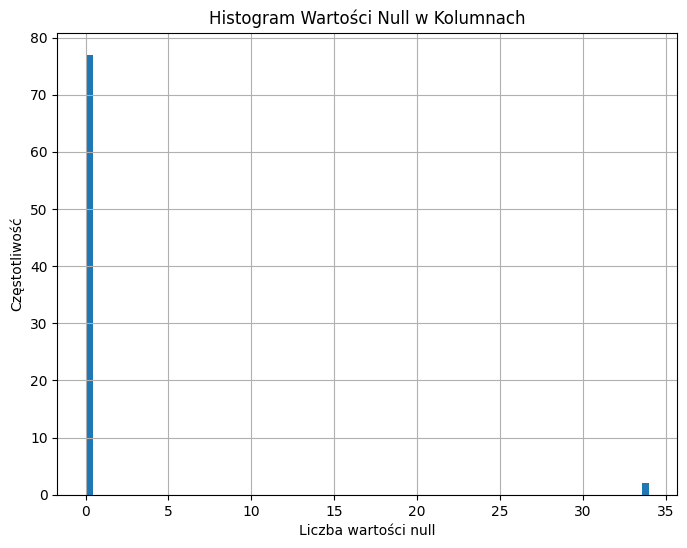

In [ ]:
# Tworzenie histogramu dla wartości null w kolumnach
plt.figure(figsize=(8, 6))
plt.hist(df.isna().sum(), bins=len(df.columns))
plt.xlabel('Liczba wartości null')
plt.ylabel('Częstotliwość')
plt.title('Histogram Wartości Null w Kolumnach')
plt.grid(True)
plt.show()
# ile kolumn ma ile null - ok 2 mają 4 wartosci null

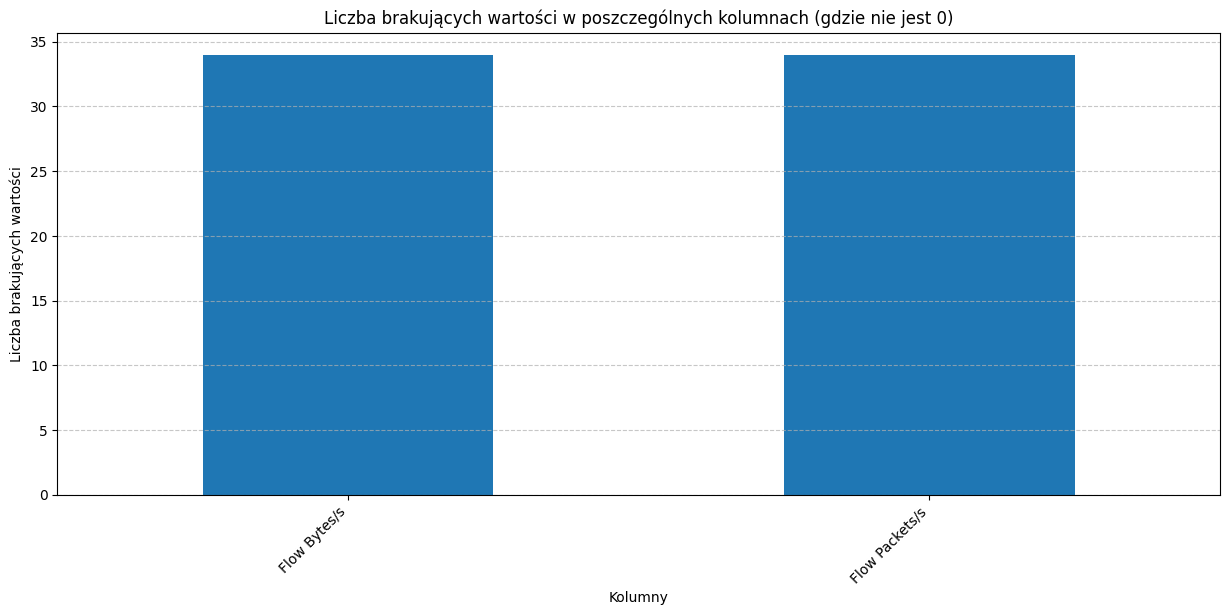

In [ ]:
null_counts = df.isnull().sum()

# Kolumny, które mają liczbę brakujących wartości różną od zera
null_counts_subset = null_counts[null_counts > 0]

# Rysowanie wykresu
plt.figure(figsize=(15, 6))
null_counts_subset.plot(kind='bar')
plt.xlabel('Kolumny')
plt.ylabel('Liczba brakujących wartości')
plt.title('Liczba brakujących wartości w poszczególnych kolumnach (gdzie nie jest 0)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Usunięcie wierszy zawierających wartości null
data_f=df.dropna()

# Sprawdzenie, ile wierszy zostało po usunięciu wartości null
print("Liczba wierszy po usunięciu wartości null:", len(data_f))

# Sprawdzenie liczby wartości null w DataFrame po usunięciu
null_counts_after_cleaning = data_f.isnull().sum()

# Wyświetlenie liczby wartości null po usunięciu
print("Liczba wartości null po usunięciu:", null_counts_after_cleaning.sum())

Liczba wierszy po usunięciu wartości null: 225711
Liczba wartości null po usunięciu: 0


In [ ]:
pd.set_option('use_inf_as_na', True) #zmienia inf na Nan
null_values=data_f.isnull().sum() #sprawdza NaN wartości
print(null_values)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [ ]:
#Wyświetlenie typu danych w kolumnach
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [ ]:
data_f['Label']=data_f['Label'].map({'BENIGN':0,'DDoS':1})
#Mapowanie wartosci obiektow label

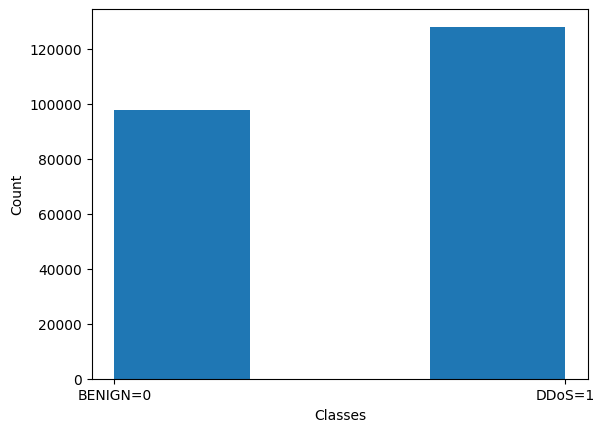

In [ ]:

plt.hist(data_f['Label'], bins=[0,0.3,0.7,1])
plt.xticks([0, 1], labels=['BENIGN=0','DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [ ]:
df.describe()
# count: Liczba niepustych wartości w danej kolumnie.
# mean: Średnia wartość dla danej kolumny.
# std: Odchylenie standardowe wartości dla danej kolumny.
# min: Najmniejsza wartość w danej kolumnie.
# 25%, 50%, 75%: Kwartyły (wartość poniżej której znajdują się dane).
# max: Największa wartość w danej kolumnie

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


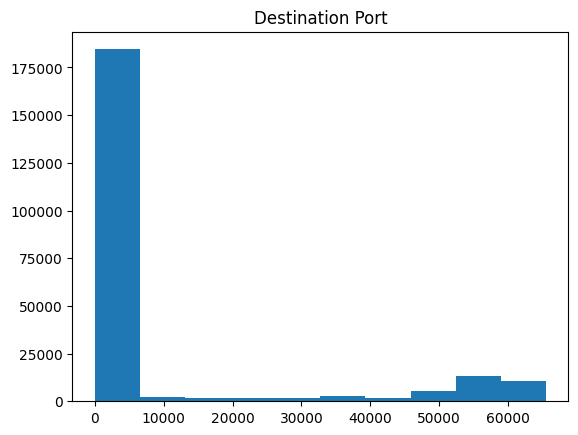

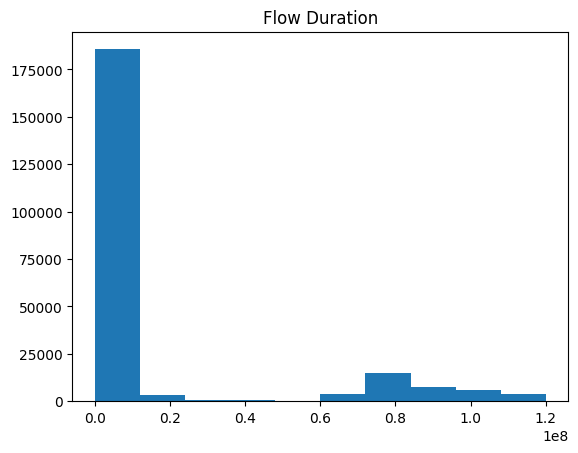

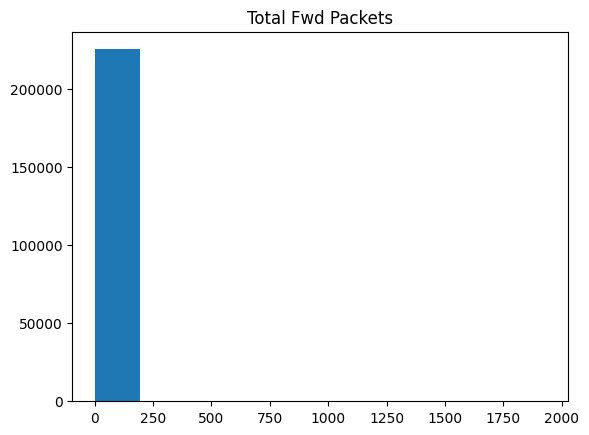

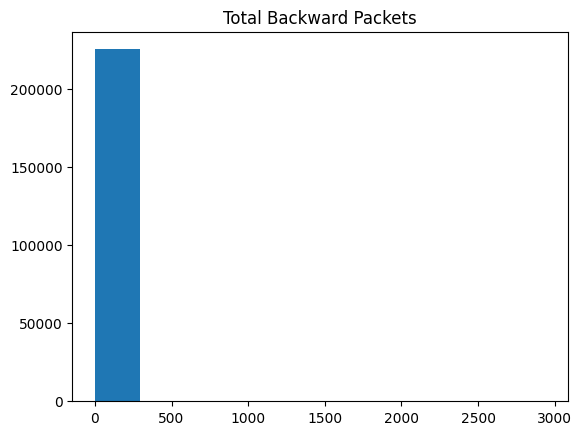

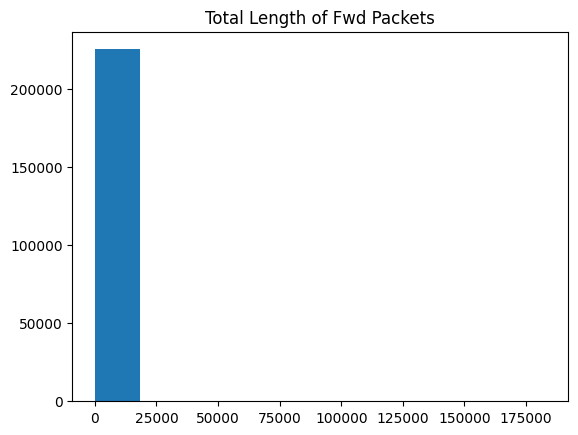

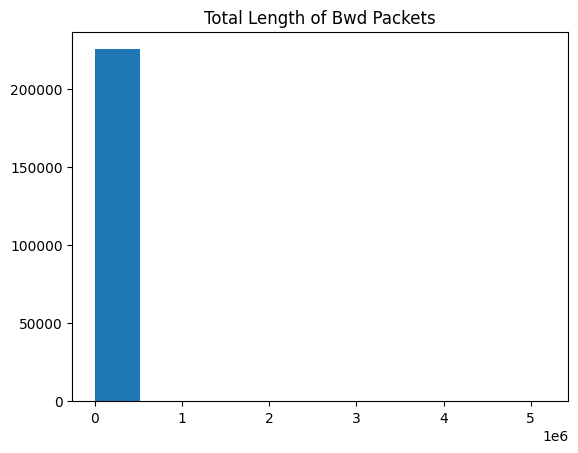

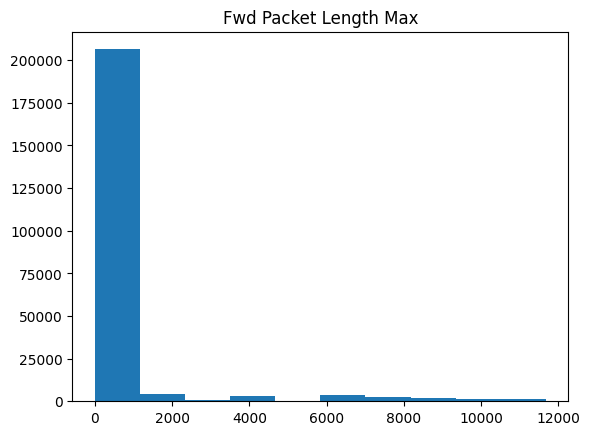

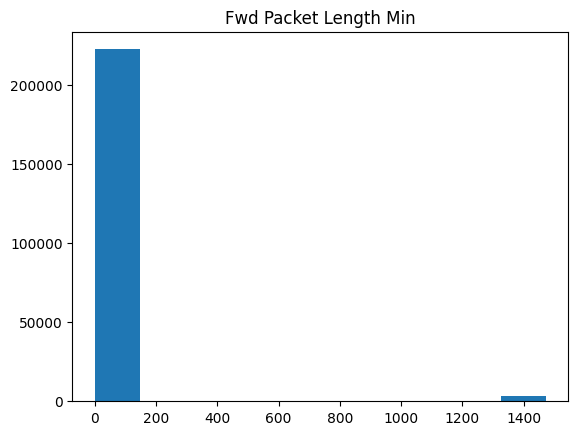

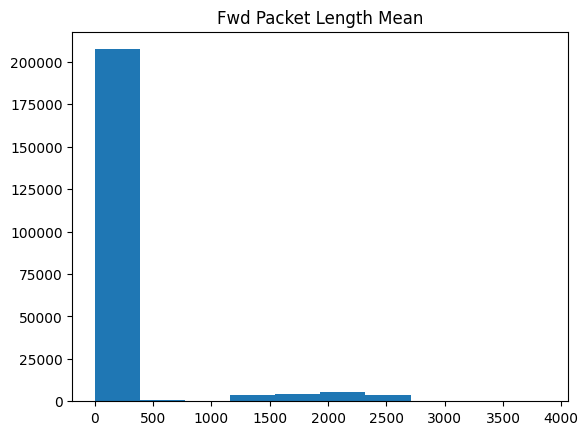

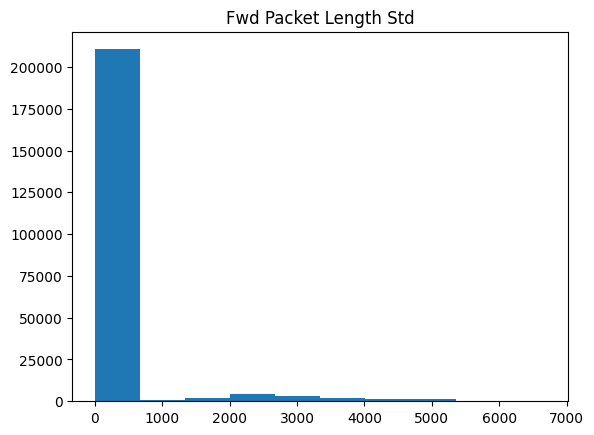

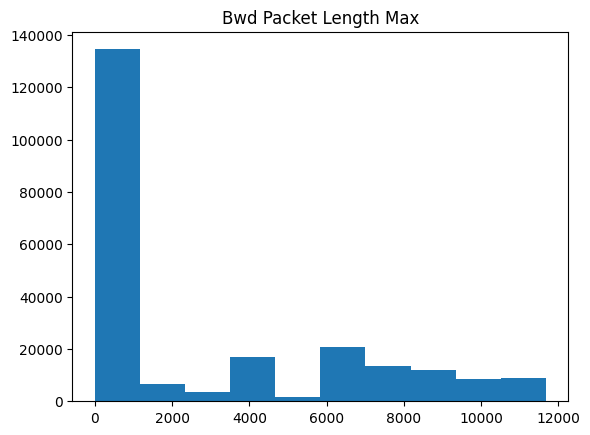

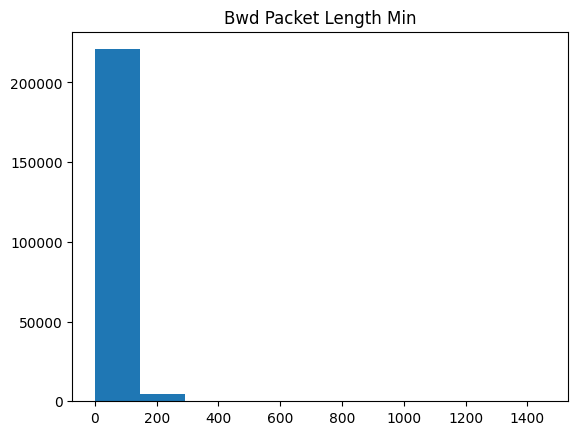

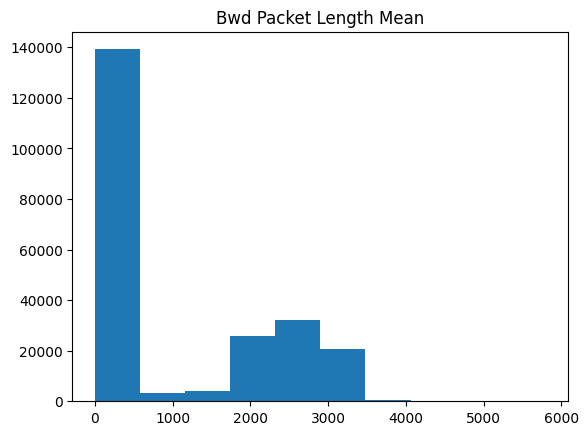

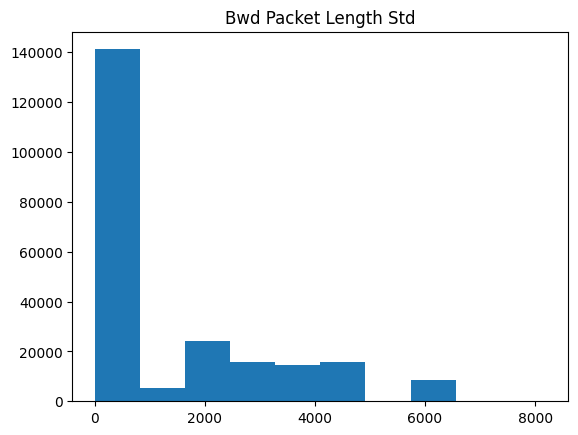

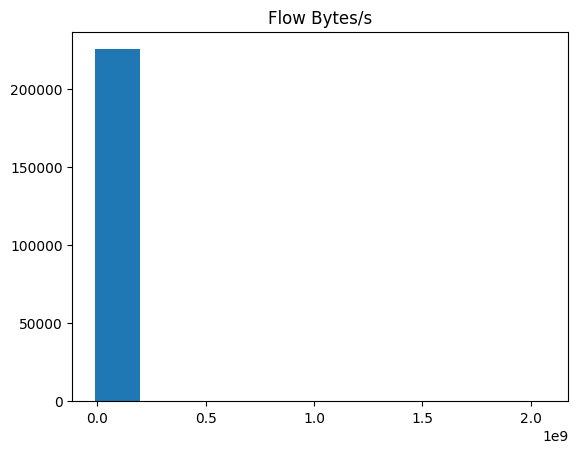

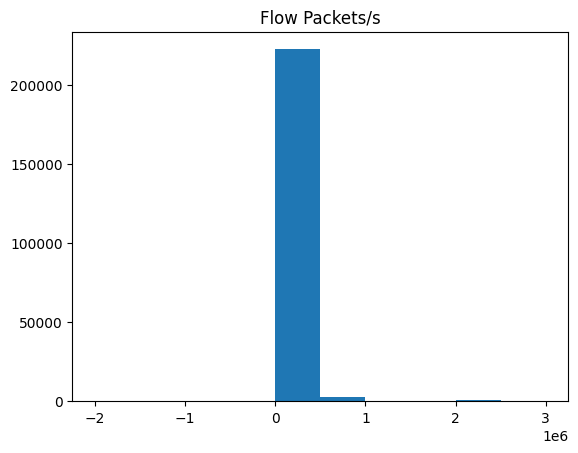

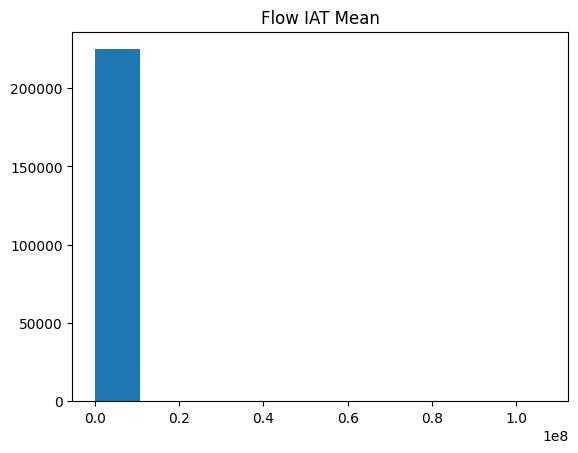

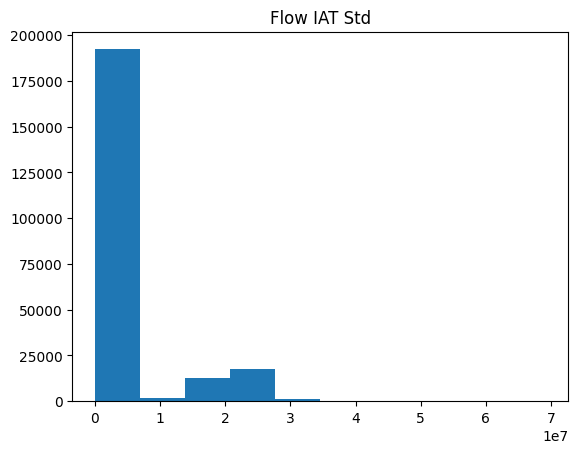

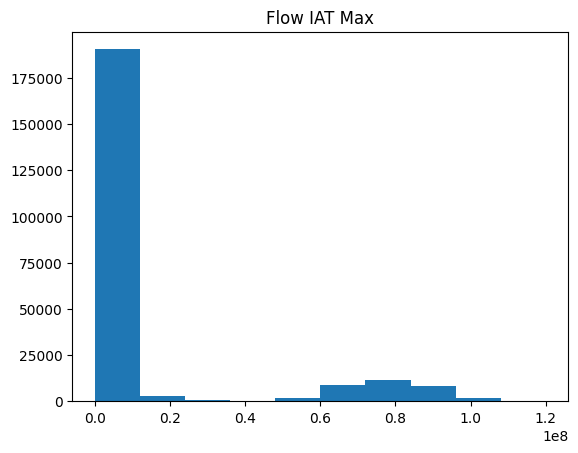

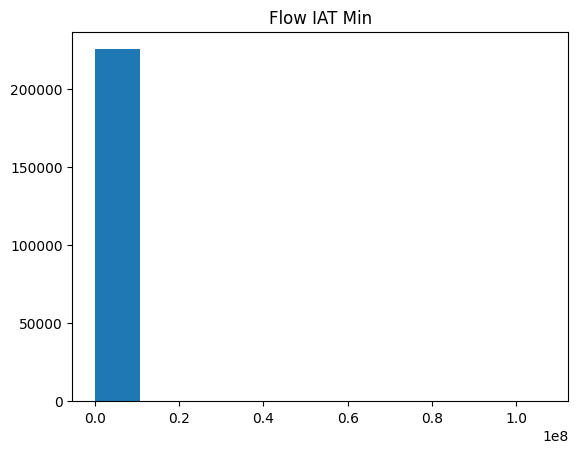

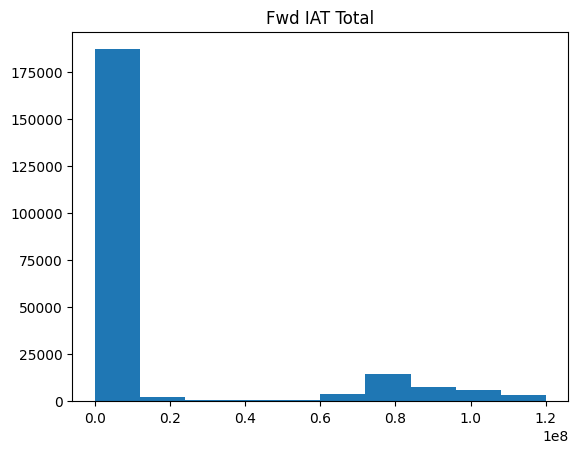

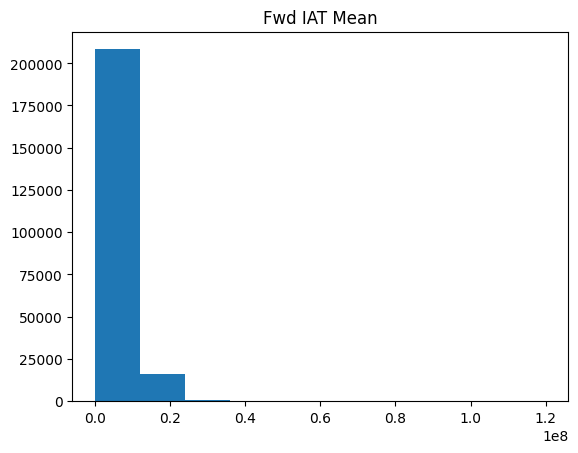

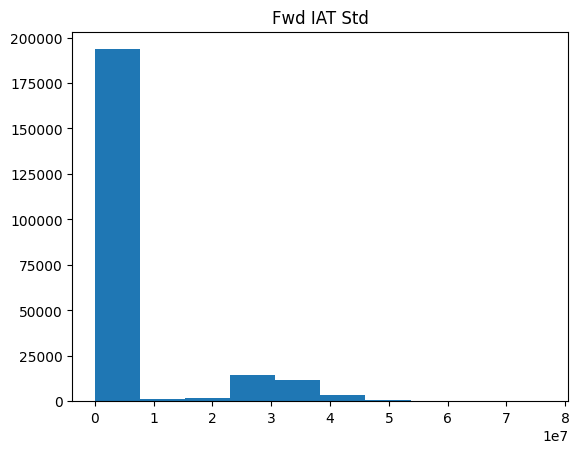

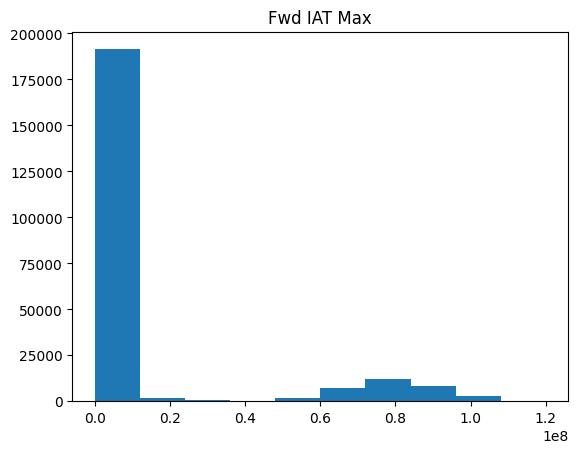

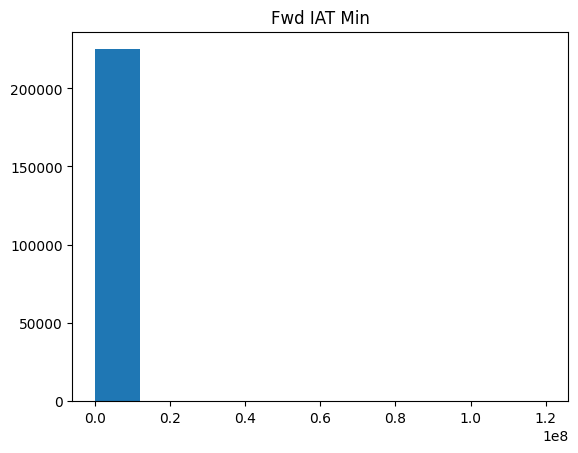

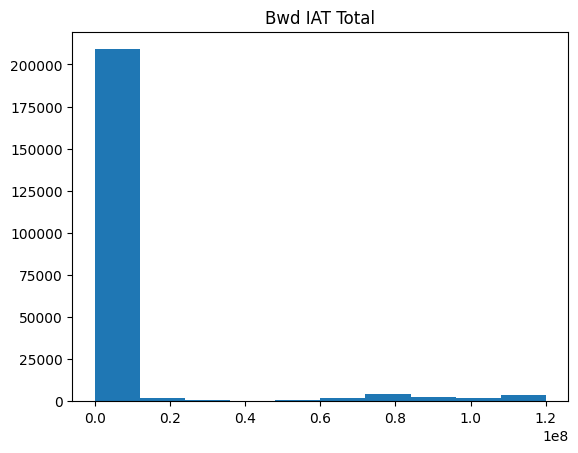

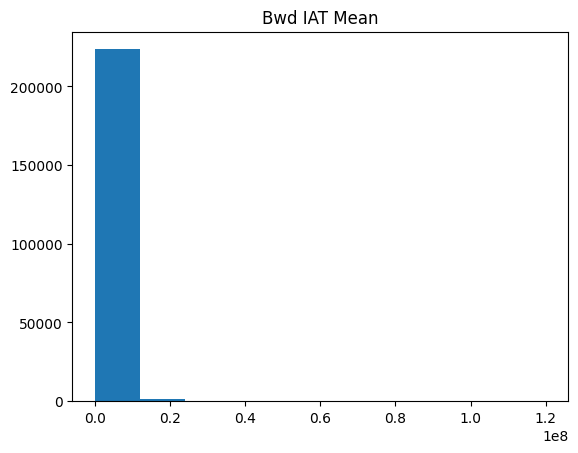

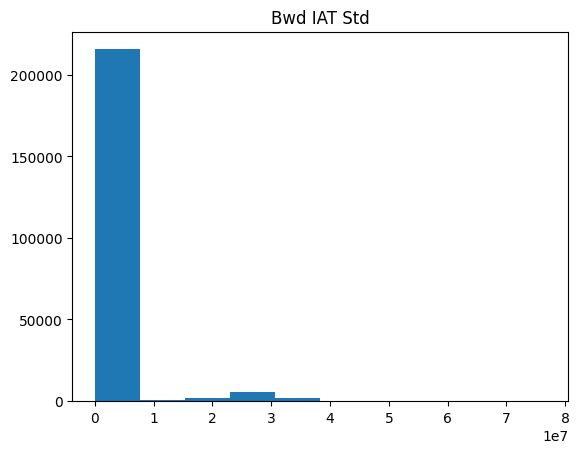

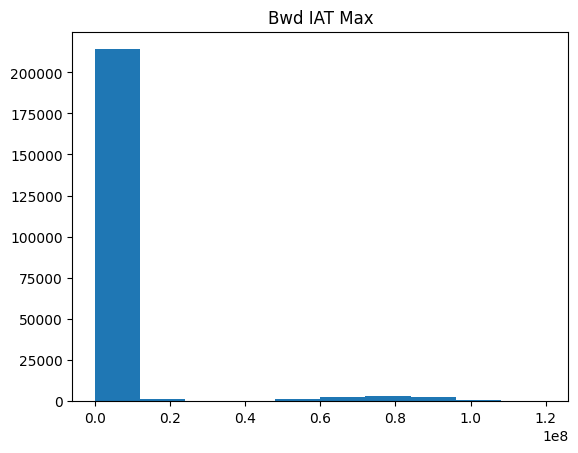

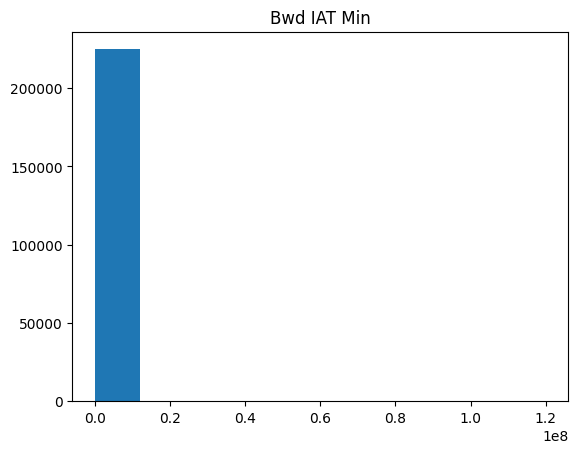

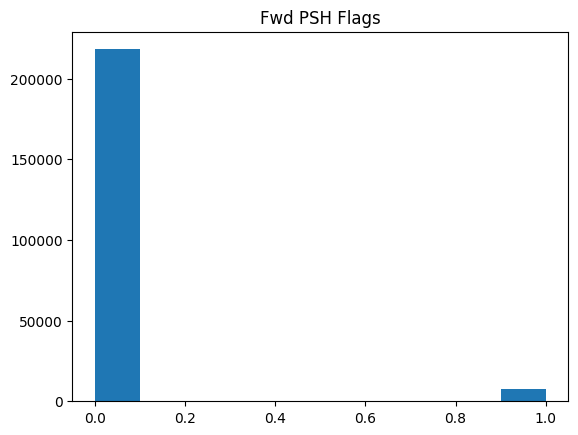

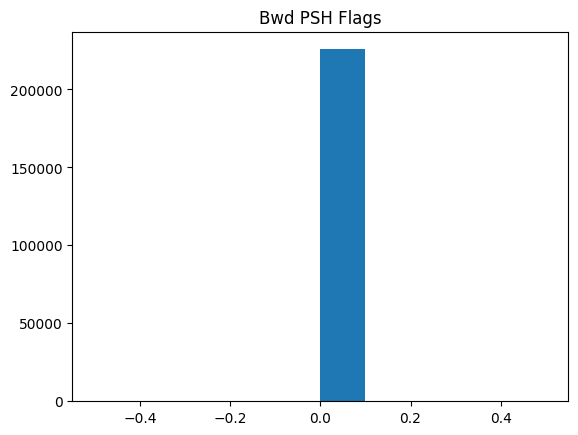

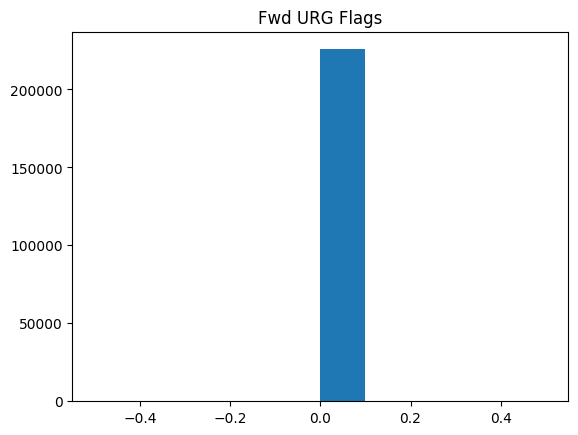

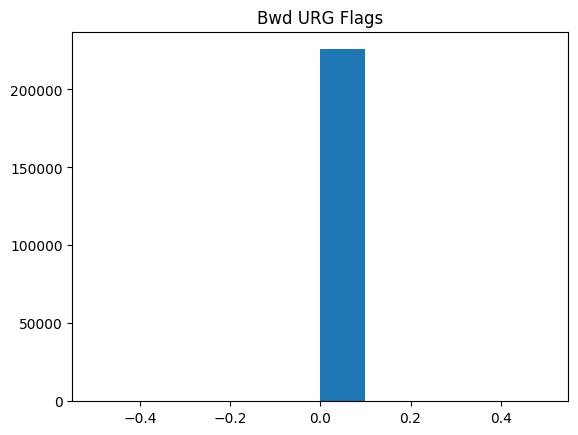

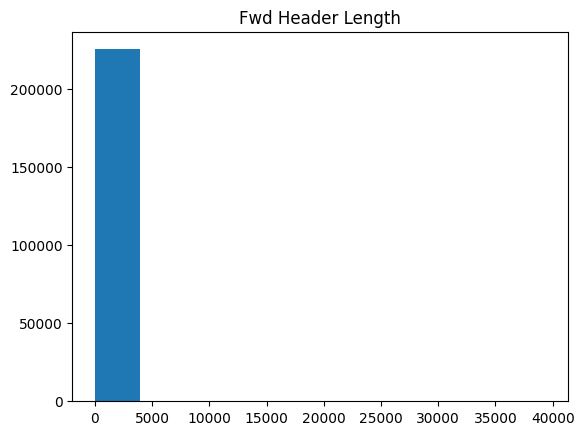

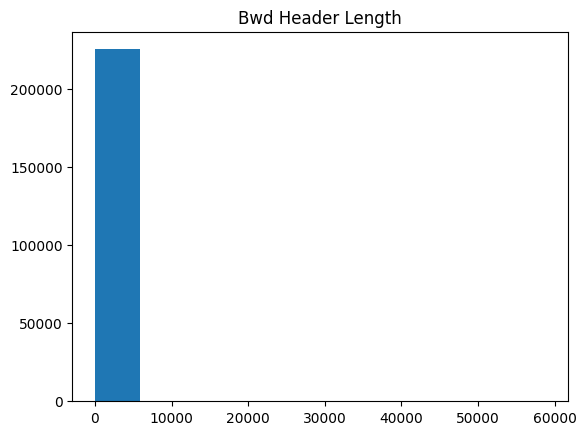

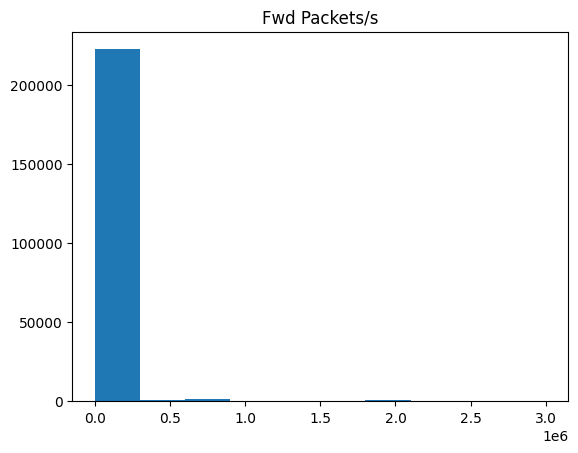

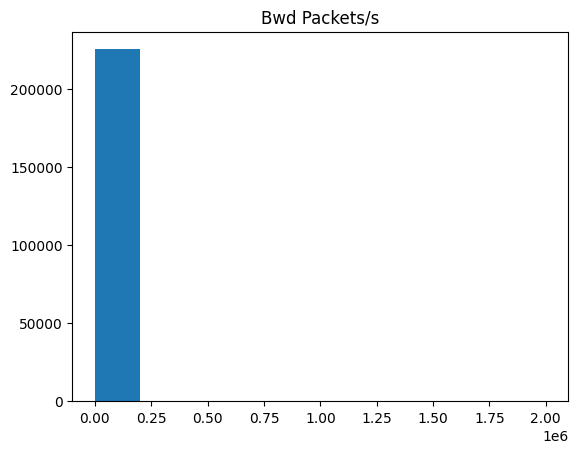

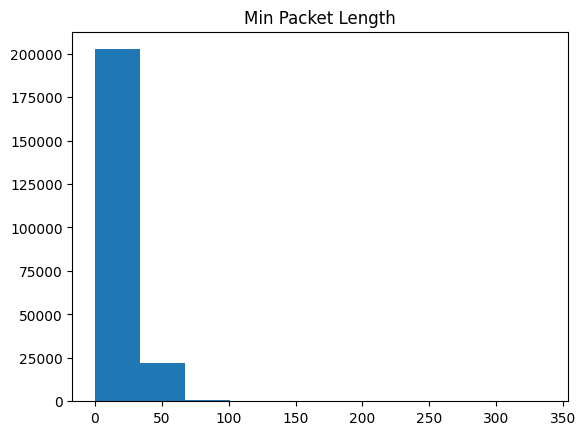

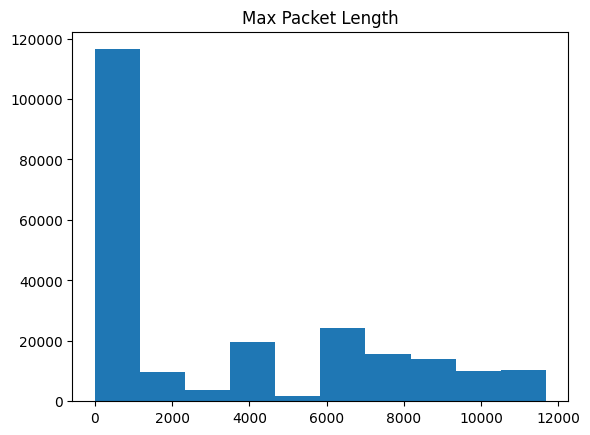

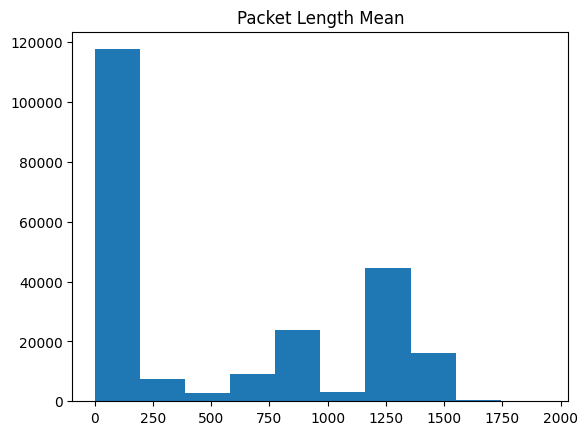

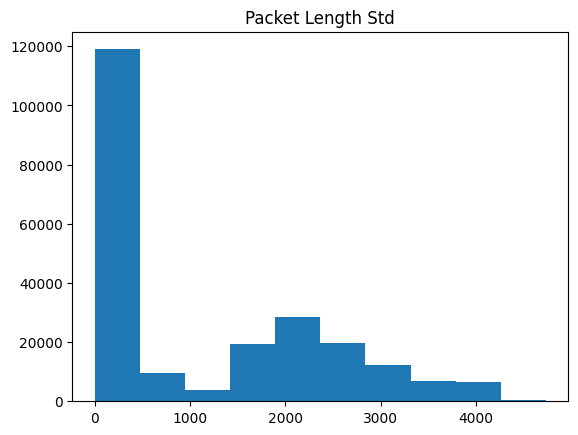

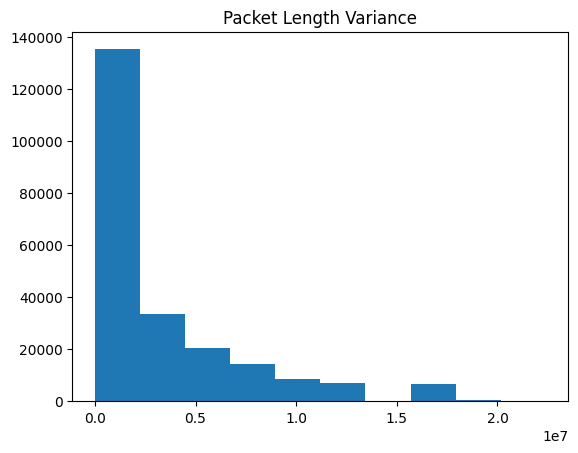

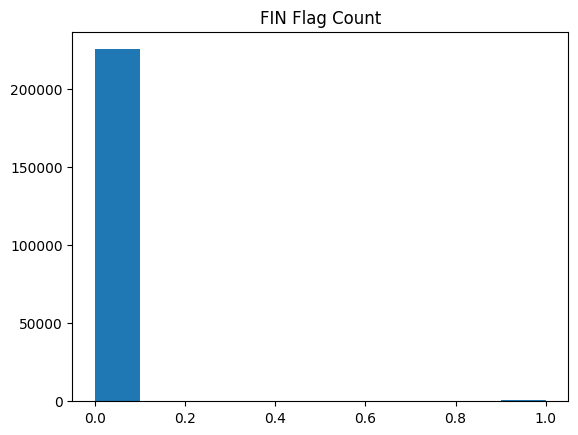

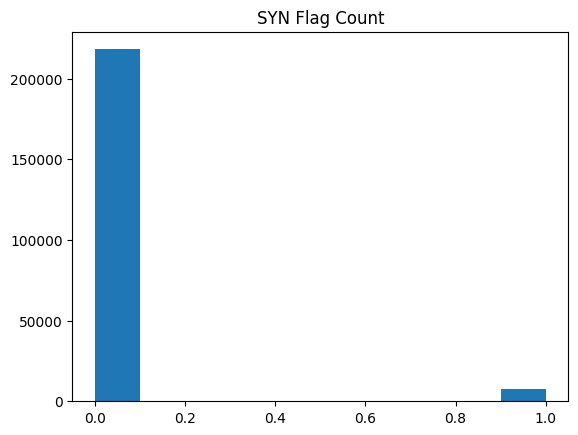

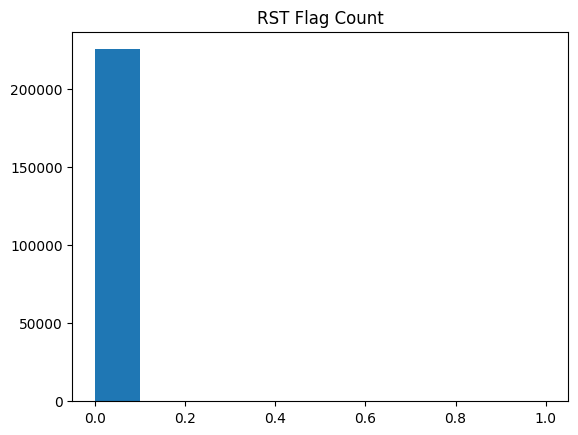

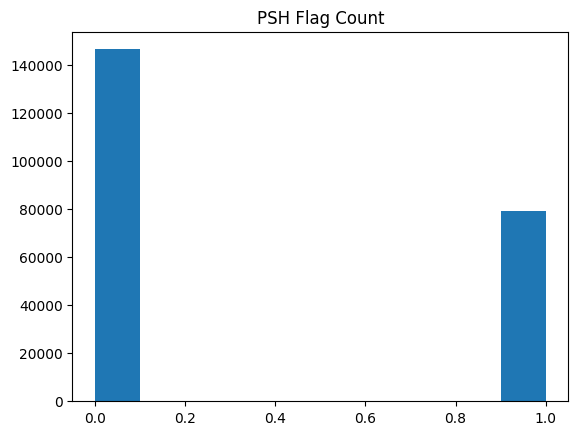

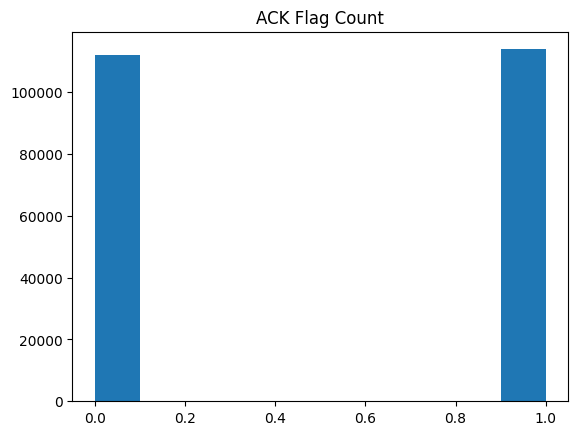

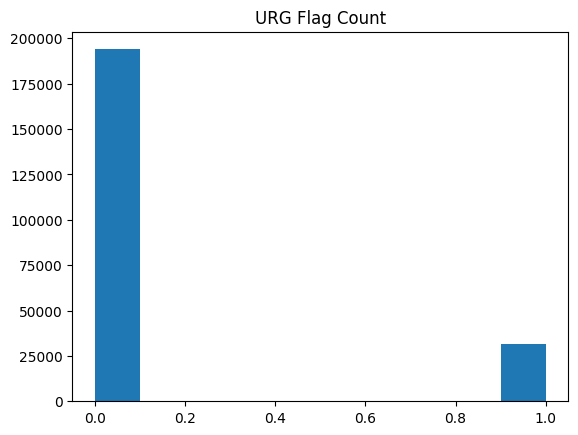

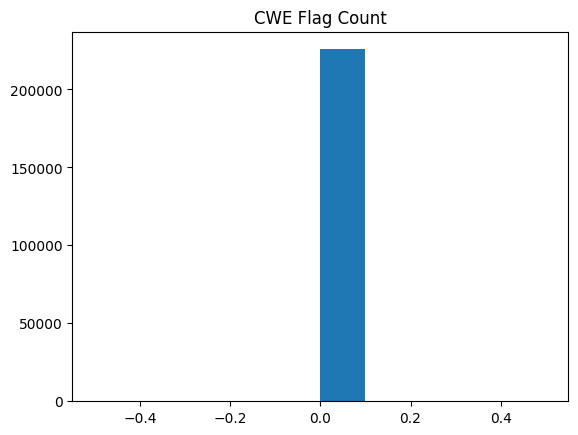

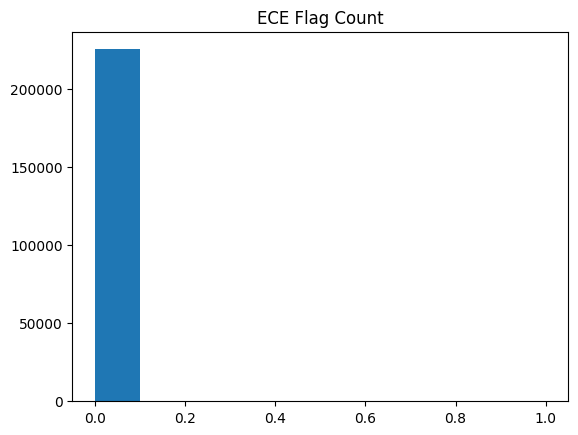

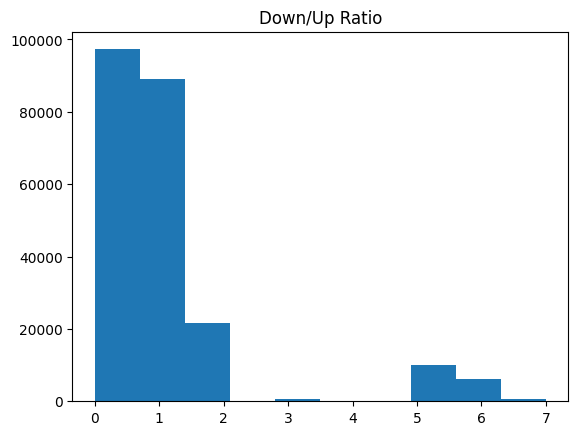

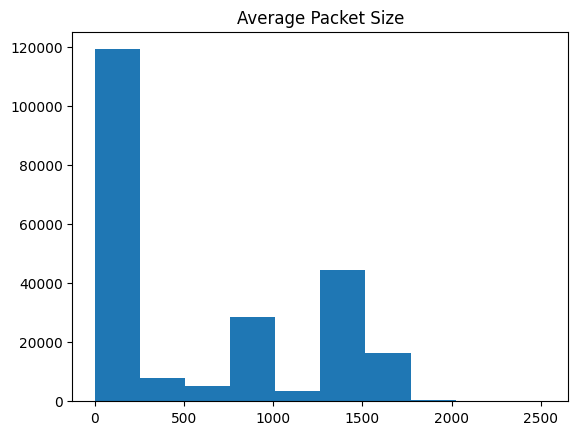

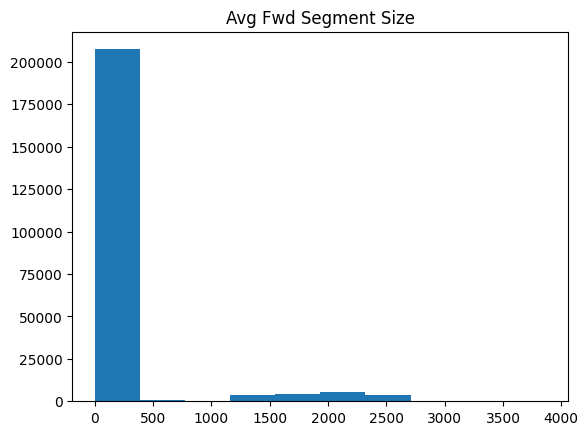

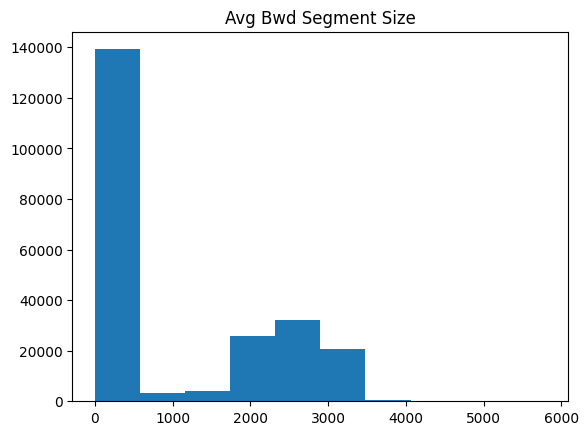

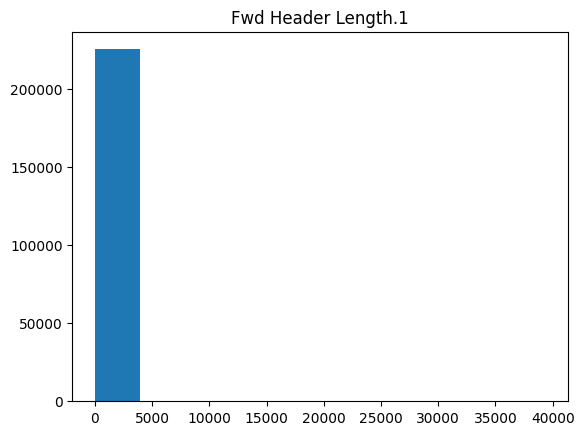

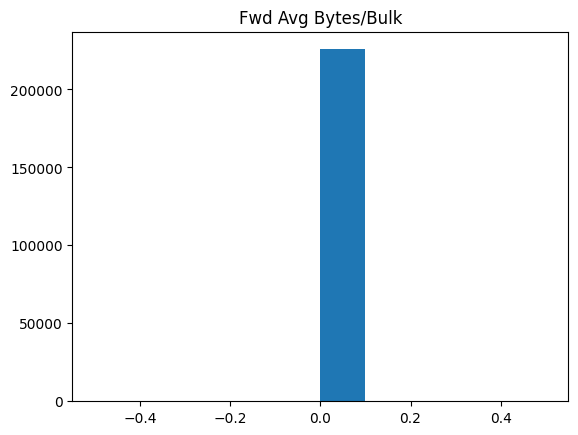

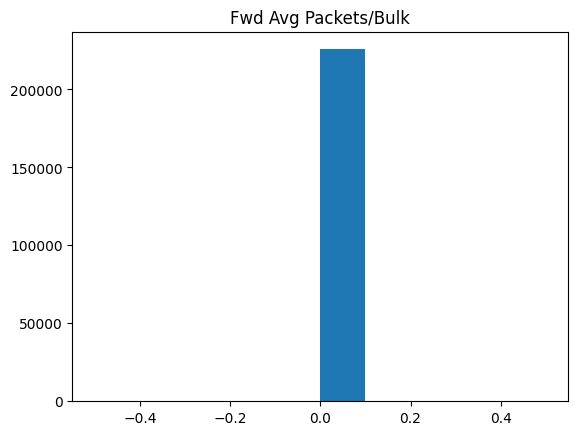

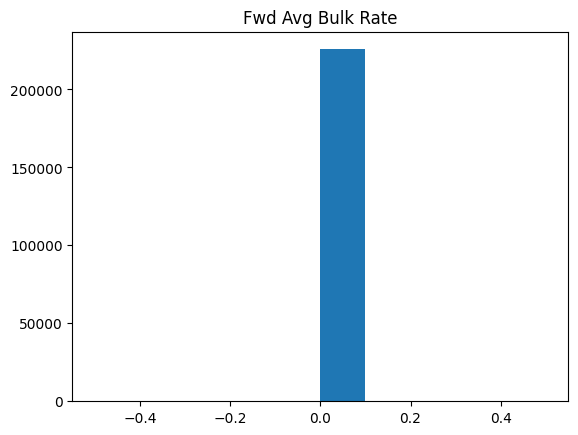

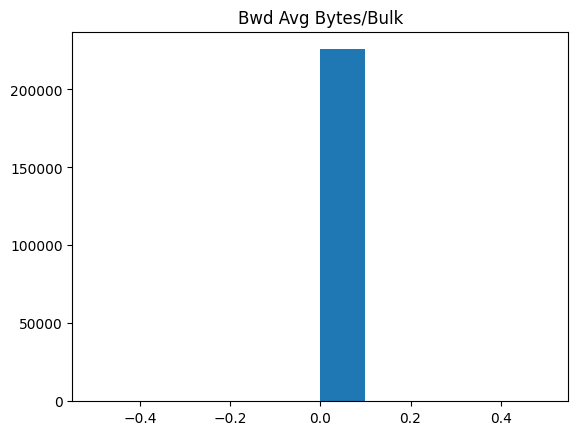

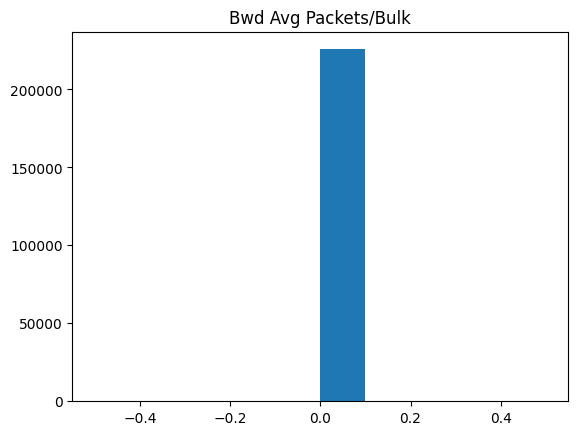

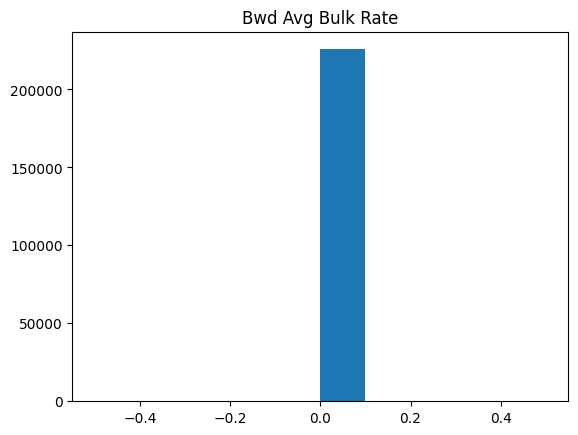

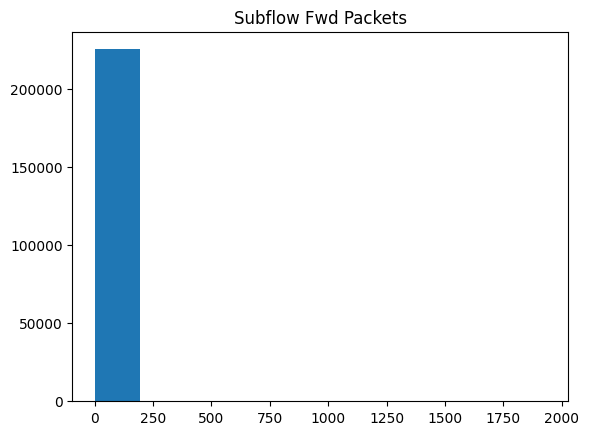

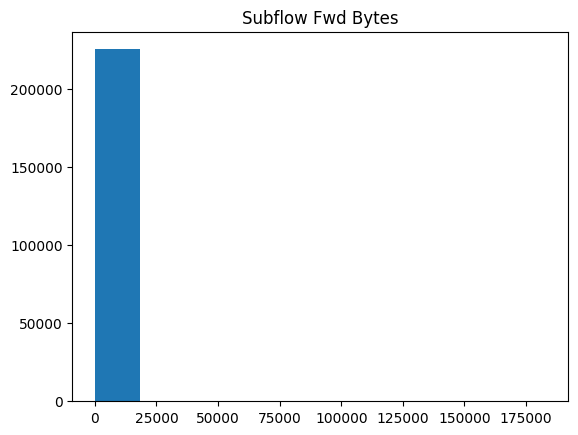

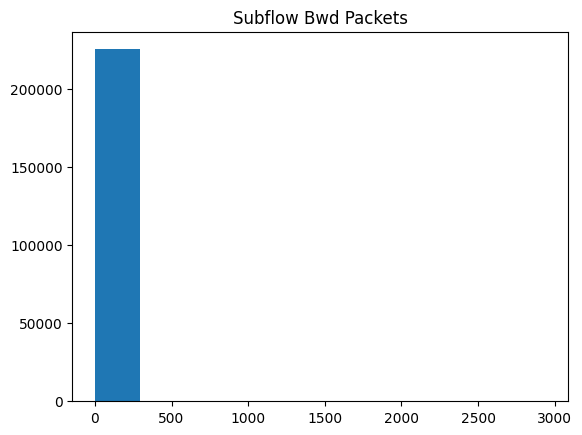

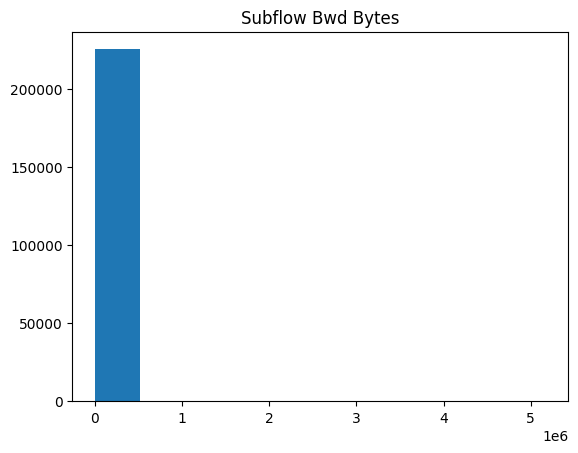

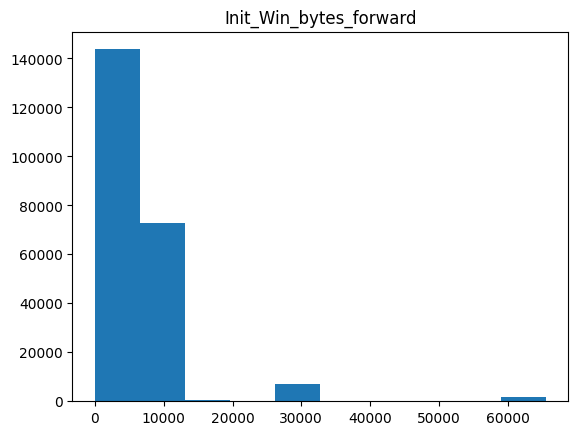

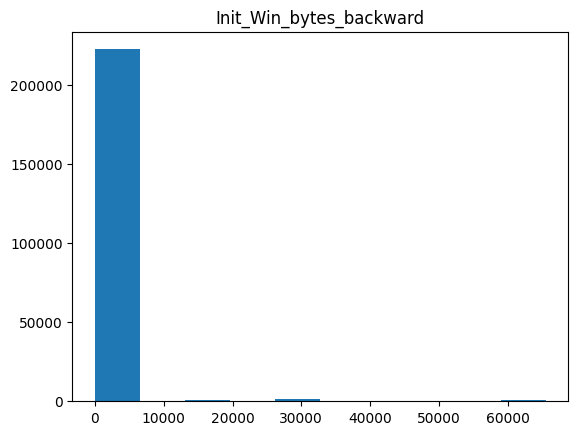

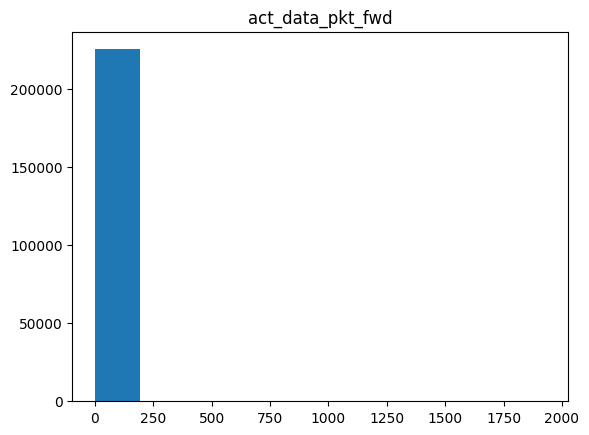

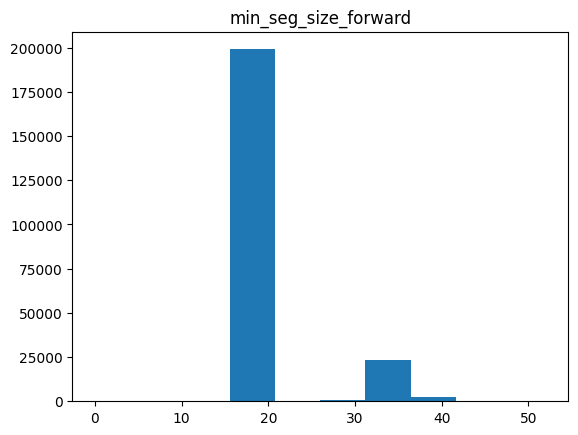

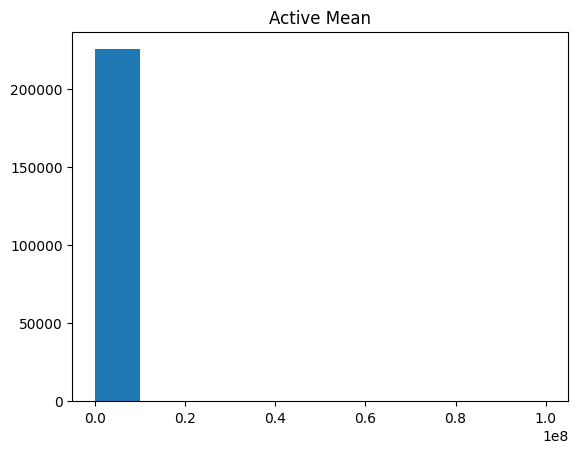

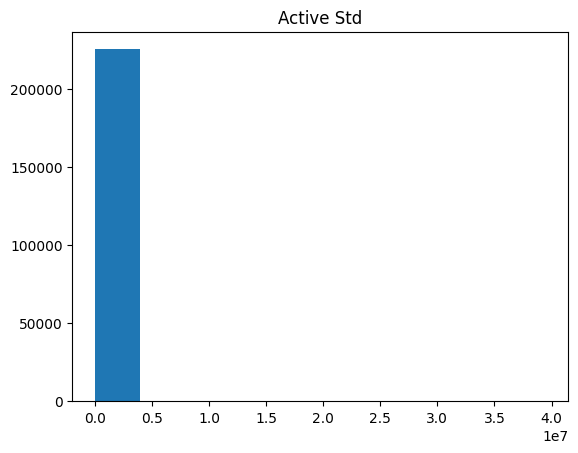

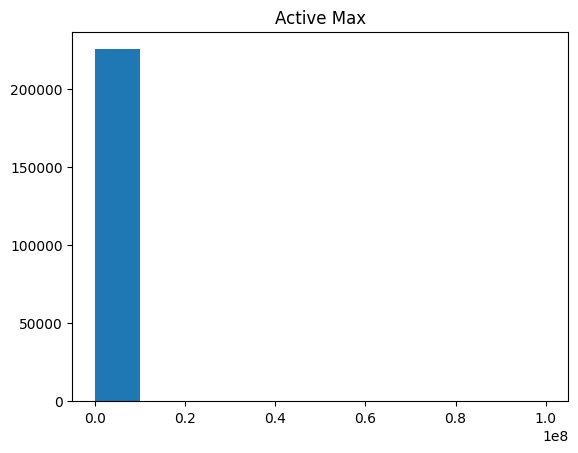

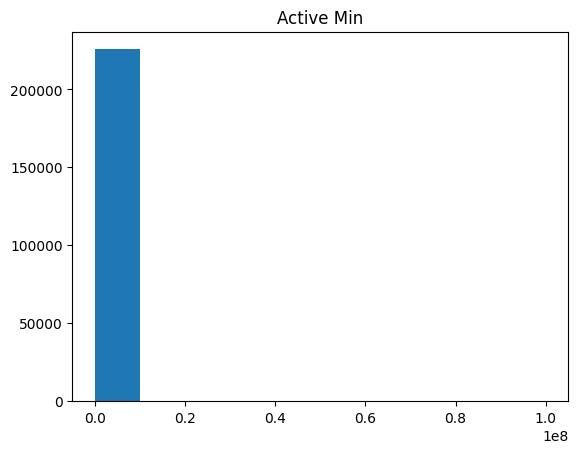

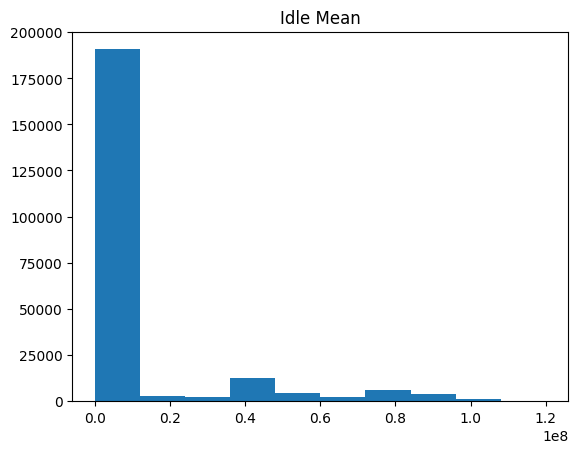

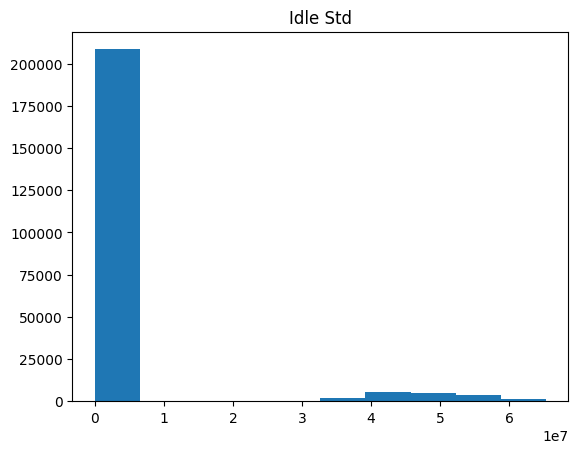

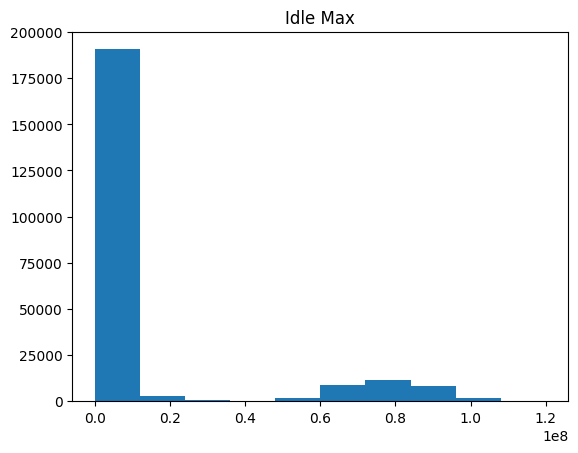

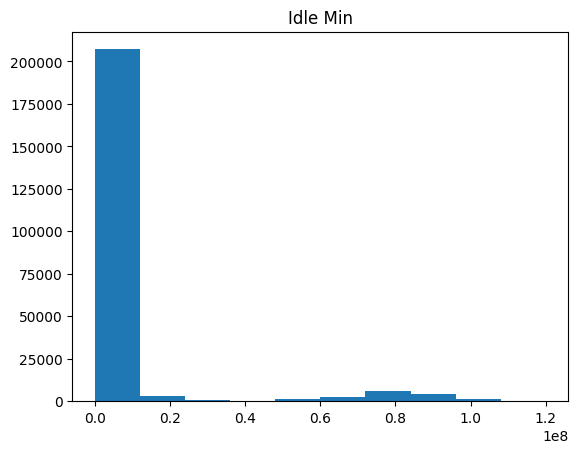

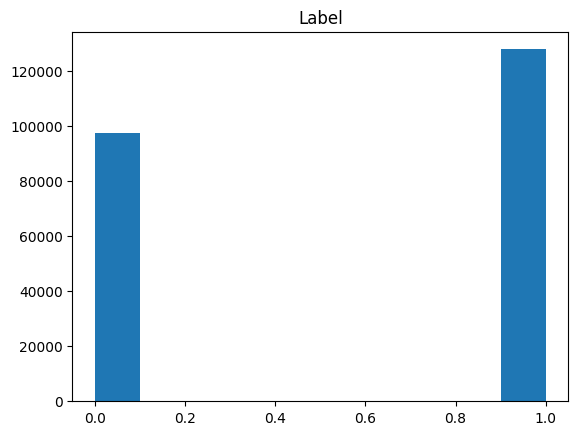

In [ ]:
plt.figure(5)
for col in data_f :
  plt.hist(data_f[col])
  plt.title(col)
  plt.show()
  #Histogramy dla każdej kolumny w DataFrame df_cleaned i wyświetla je w jednym wykresie.

In [ ]:
# Podział danych na zmienne niezależne (X) i zmienną zależną (y) y-sam label - aby to przewidziec na podstawie pozostałych cech
#Zmienna zależna (cel, wyjście, odpowiedź) (y): Jest to zmienna, którą chcemy przewidzieć lub wyjaśnić.
#X zawiera cechy (zmienne niezależne):

X = data_f.drop('Label', axis=1)
y = data_f['Label']


# Podział danych na zbiory treningowy i testowy test size 30%testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Sprawdzenie rozmiarów zbiorów
print("Rozmiar zbioru treningowego (X_train):", X_train.shape)
print("Rozmiar zbioru testowego (X_test):", X_test.shape)
print("Rozmiar zbioru treningowego (y_train):", y_train.shape)
print("Rozmiar zbioru testowego (y_test):", y_test.shape)

# Wyświetlenie fragmentu zbiorów dla weryfikacji
print("\nFragment zbioru treningowego (X_train):")
print(X_train.head())

print("\nFragment zbioru testowego (X_test):")
print(X_test.head())

print("\nFragment zbioru treningowego (y_train):")
print(y_train.head())

print("\nFragment zbioru testowego (y_test):")
print(y_test.head())


Rozmiar zbioru treningowego (X_train): (157997, 78)
Rozmiar zbioru testowego (X_test): (67714, 78)
Rozmiar zbioru treningowego (y_train): (157997,)
Rozmiar zbioru testowego (y_test): (67714,)

Fragment zbioru treningowego (X_train):
        Destination Port  Flow Duration  Total Fwd Packets  \
150483                80       96603635                  8   
27917                 80        3524574                  5   
44675                 80        6108847                  5   
5374               55303           2325                  2   
12721                 53         195383                  2   

        Total Backward Packets  Total Length of Fwd Packets  \
150483                       5                           56   
27917                        0                           30   
44675                        0                           30   
5374                         0                           12   
12721                        2                          100   

        Total L

W drzewie decyzyjnym, gałęzie reprezentują podział danych na podstawie wartości cech. Każdy węzeł w drzewie reprezentuje test na jednej z cech. W przypadku binarnego podziału (który jest typowy dla drzew decyzyjnych), istnieją dwie gałęzie wychodzące z każdego węzła: jedna dla przypadków, które spełniają warunek testu, i druga dla przypadków, które go nie spełniają.

Oto krótkie wyjaśnienie, co reprezentują gałęzie w drzewie decyzyjnym:

Węzły wewnętrzne:

Każdy węzeł wewnętrzny zawiera test na jednej z cech. Gałęzie wychodzące z węzła odpowiadają wynikowi testu: Gałąź po lewej stronie oznacza, że przypadki spełniają warunek testu. Gałąź po prawej stronie oznacza, że przypadki nie spełniają warunku testu. Liście (węzły końcowe):

Liście nie zawierają testu na cechę. Są to końcowe węzły, które przypisują przewidywane wartości dla danego przypadku. Każda gałąź w drzewie decyzyjnym reprezentuje podział zbioru danych na podzbiory na podstawie wartości pewnej cechy. Im głębiej w drzewie, tym bardziej złożony jest podział danych na podzbiory. Ostatecznie, w liściach drzewa, dokonywane są prognozy dla przypadków na podstawie reguł, które zostały wyuczone w trakcie trenowania modelu.


drzewa decyzyjne 10 w lesie, mniej głębokie


In [ ]:
import time
#drzewa decyzyjne

# Inicjalizacja modelu Random Forest
rf_model = RandomForestClassifier(max_depth=3,n_estimators=10, random_state=42)
#n_estimators to liczba drzew w lesie
#random_state pozwala na kontrolę losowości podczas trenowania modelu, zapewniając powtarzalność wyników.


start_train_time = time.time()
# Trenowanie modelu na danych treningowych
rf_model.fit(X_train, y_train)
end_train_time = time.time()

train_time = end_train_time - start_train_time
print("Czas uczenia modelu Random Forest:", train_time)

start_pred_time = time.time()
# Przewidywanie klas dla danych testowych
rf_pred = rf_model.predict(X_test)

end_pred_time = time.time()

pred_time = end_pred_time - start_pred_time
print("Czas przewidywania modelu Random Forest:", pred_time)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, rf_pred)
print("Dokładność modelu Random Forest:", accuracy)

Czas uczenia modelu Random Forest: 1.662532091140747
Czas przewidywania modelu Random Forest: 0.08495903015136719
Dokładność modelu Random Forest: 0.9957911214815253


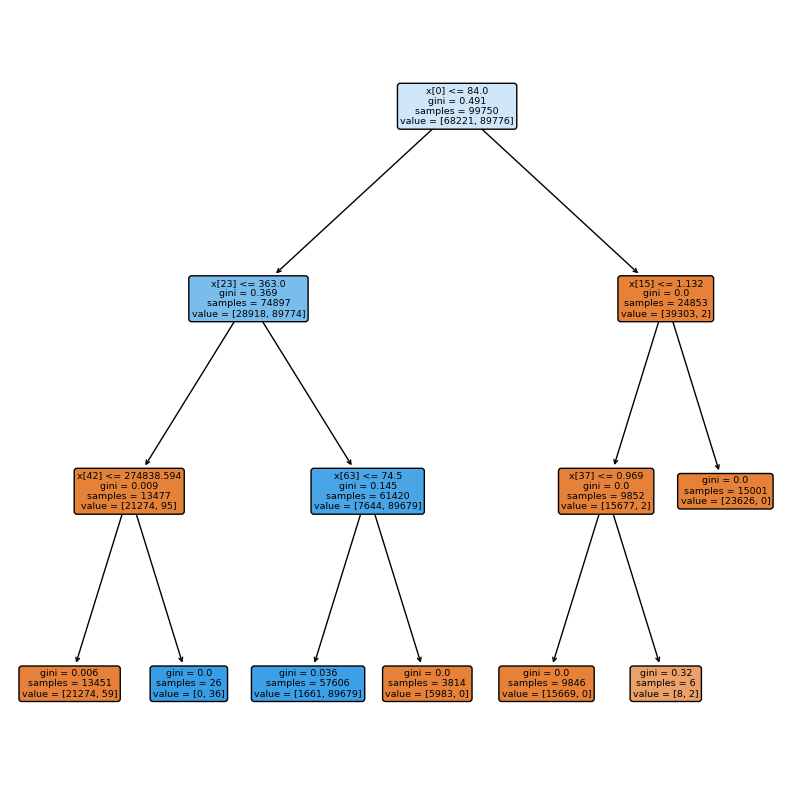

In [ ]:
# Pobiera jedno z drzew decyzyjnych składających się na model Random Forest.
estimator_top=rf_model.estimators_[0]

plt.figure(figsize=(10,10))
plot_tree(estimator_top,filled=True,rounded=True)
plt.show()

Drzewa decyzyjne- 10 drzew w lesie. bardziej głębokie


In [ ]:
import time
#drzewa decyzyjne

# Inicjalizacja modelu Random Forest
rf2_model = RandomForestClassifier(max_depth=10,n_estimators=10, random_state=42)
#n_estimators to liczba drzew w lesie
#random_state pozwala na kontrolę losowości podczas trenowania modelu, zapewniając powtarzalność wyników.


start_train_time = time.time()

# Trenowanie modelu na danych treningowych
rf2_model.fit(X_train, y_train)

end_train_time = time.time()
train_time = end_train_time - start_train_time
print("Czas uczenia modelu Random Forest:", train_time)
start_pred_time = time.time()

# Przewidywanie klas dla danych testowych
rf2_pred = rf2_model.predict(X_test)

end_pred_time = time.time()

pred_time = end_pred_time - start_pred_time
print("Czas przewidywania modelu Random Forest:", pred_time)

# Obliczenie dokładności modelu
accuracy2 = accuracy_score(y_test, rf2_pred)
print("Dokładność modelu Random Forest:", accuracy2)



Czas uczenia modelu Random Forest: 7.2110583782196045
Czas przewidywania modelu Random Forest: 0.1481187343597412
Dokładność modelu Random Forest: 0.9997194080987684


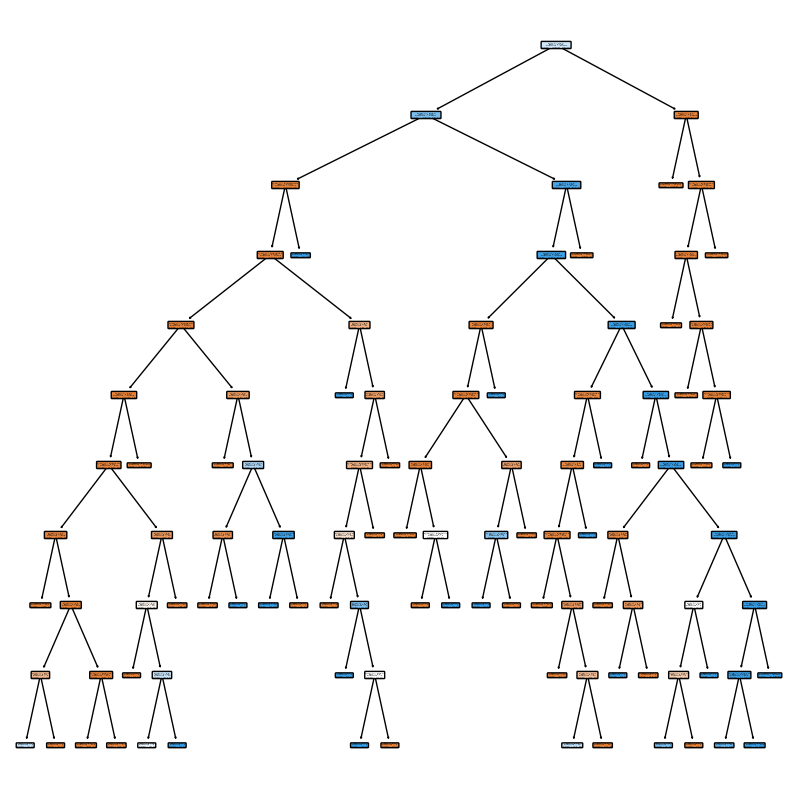

In [ ]:
# Pobiera jedno z drzew decyzyjnych składających się na model Random Forest.
estimator2=rf2_model.estimators_[0]

plt.figure(figsize=(10,10))
plot_tree(estimator2,filled=True,rounded=True)
plt.show()

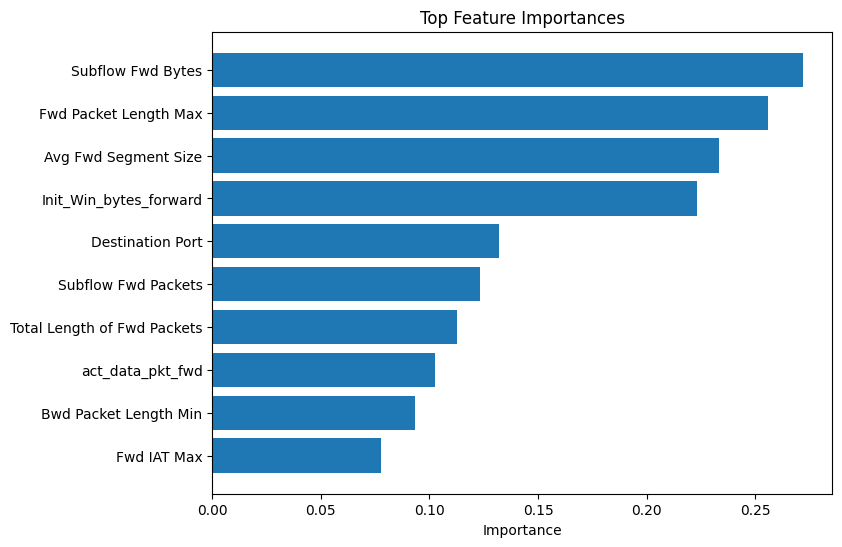

In [ ]:
  #importances = random_forest_model.feature_importances_: Przypisuje wartości ważności cech uzyskane przez model Rndaom Forest do zmiennej importances. określające,
# jak bardzo każda cecha przyczynia się do poprawy jakości (czystości) podziałów węzłów
n_top_features = 10

#polaczenie najważniejszych cech z 2 drzew
importances = rf_model.feature_importances_
importances2 =rf2_model.feature_importances_
combined_importances=importances+importances2
#Tworzy listę indeksów od 0 do len(importances)-1 (indeksy cech), a następnie sortuje je w oparciu o odpowiadające im wartości ważności cech
indices = sorted(range(len(combined_importances)), key=lambda i: combined_importances[i], reverse=True)[:n_top_features]

#Tworzy listę nazw cech (feature_names) poprzez iterację po posortowanych indeksach indices
original_feature_names = df.columns
feature_names = [original_feature_names[i] for i in indices]



#Plotting feature importances horizontally
plt.figure(figsize=(8, 6))  # Dopasowanie rozmiaru wykresu do mniejszej liczby cech
plt.barh(range(len(indices)), combined_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Odwrócenie osi y, aby najważniejsze cechy były na górze
plt.show()


In [ ]:
# Obliczanie dokładności
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Dokładność: {rf_accuracy:.4f}")

# Obliczanie wyniku F1
rf_f1 = f1_score(y_test, rf_pred)
print(f"Wynik F1: {rf_f1:.4f}")

# Obliczanie precyzji
rf_precision = precision_score(y_test, rf_pred)
print(f"Precyzja: {rf_precision:.4f}")

# Obliczanie czułości
rf_recall = recall_score(y_test, rf_pred)
print(f"Czułość: {rf_recall:.4f}")

Dokładność: 0.9958
Wynik F1: 0.9963
Precyzja: 0.9940
Czułość: 0.9986


In [ ]:
# macierz pomyłek

def plot_confusion_matrix(y_true, y_pred, classes, title):

    #y_true (array-like): Tablica rzeczywistych etykiet klas.
    #y_pred (array-like): Tablica przewidywanych etykiet klas.
    #classes (list): Lista nazw klas.
    #title (str): Tytuł wykresu.

    # Oblicz macierz pomyłek
    cm = confusion_matrix(y_true, y_pred)

    # Twórz nową figurę o odpowiednim rozmiarze
    plt.figure(figsize=(8, 6))

    # Rysuj mapę cieplną macierzy pomyłek
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

    # Dodaj etykiety osi x i y oraz tytuł
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

    # Wyświetl wykres
    plt.show()

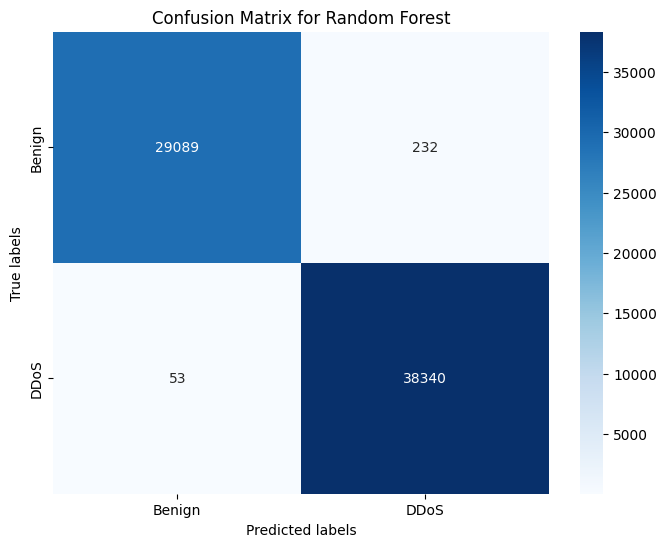

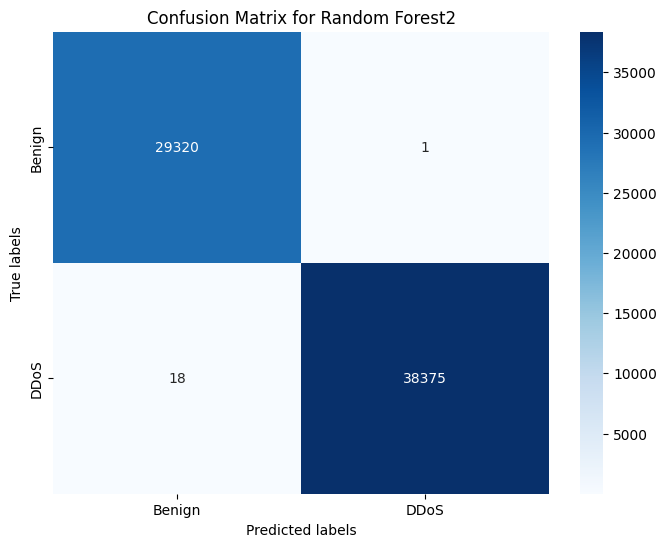

In [ ]:
#Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Random Forest')
#Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf2_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Random Forest2')

In [ ]:
# Wyodrębnienie najważniejszych cech z danych treningowych i testowych

X_train_top_features = X_train.iloc[:, indices]
X_test_top_features = X_test.iloc[:, indices]

rf_model_top = RandomForestClassifier(max_depth=10,n_estimators=10, random_state=50)

start_train_time = time.time()

# Trenowanie modelu na danych treningowych
rf_model_top.fit(X_train_top_features, y_train)

end_train_time = time.time()
train_time = end_train_time - start_train_time

print("czas nauki: ",train_time)

# Przewidywanie klas dla danych testowych
rf_pred_top = rf_model_top.predict(X_test_top_features)





# Obliczenie dokładności modelu
accuracy_top = accuracy_score(y_test, rf_pred_top)
print("Dokładność modelu Random Forest:", accuracy_top)

czas nauki:  1.4320309162139893
Dokładność modelu Random Forest: 0.9997046401039666


Szybszy czas uczenia kosztem niewielkiego spadku dokładności ucząc się na najbardziej znaczących cechach

In [ ]:

# Obliczanie wyniku F1
rf_f1_top = f1_score(y_test, rf_pred)
print(f"Wynik F1: {rf_f1:.4f}")

# Obliczanie precyzji
rf_precision_top = precision_score(y_test, rf_pred_top)
print(f"Precyzja: {rf_precision_top:.4f}")

# Obliczanie czułości
rf_recall_top = recall_score(y_test, rf_pred_top)
print(f"Czułość: {rf_recall_top:.4f}")

Wynik F1: 0.9963
Precyzja: 0.9999
Czułość: 0.9996


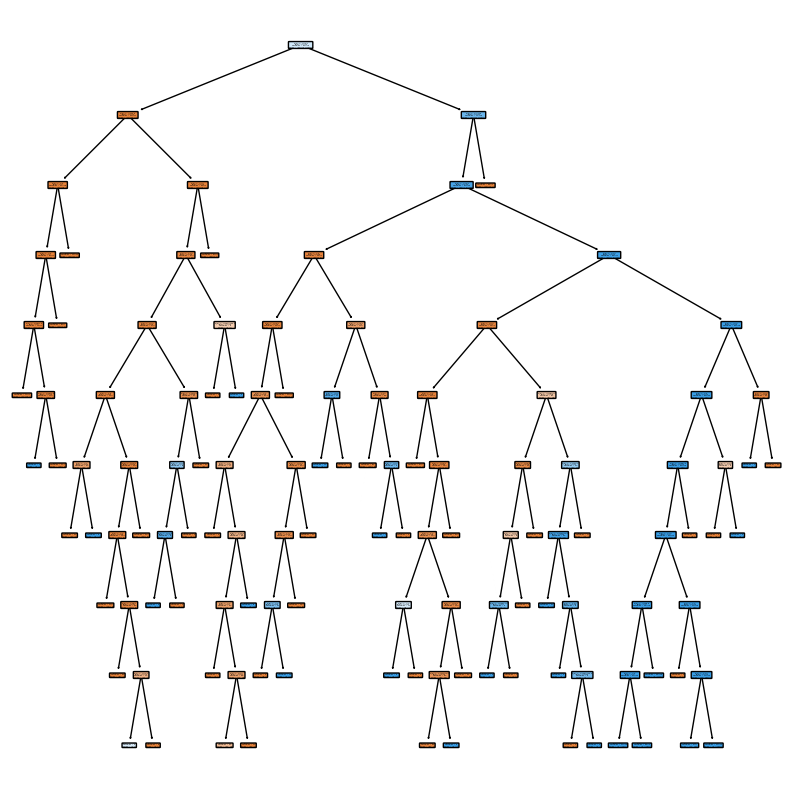

In [ ]:
# Pobiera jedno z drzew decyzyjnych składających się na model Random Forest.
estimator_top=rf_model_top.estimators_[0]

plt.figure(figsize=(10,10))
plot_tree(estimator_top,filled=True,rounded=True)
plt.show()

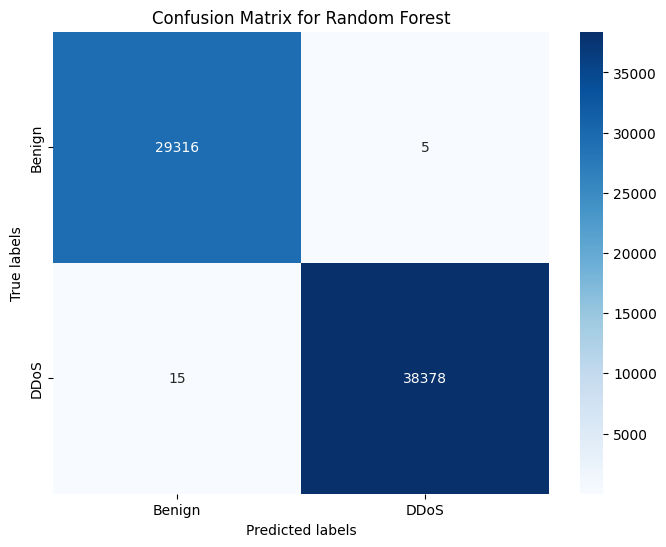

In [ ]:
#Confusion Matrix dla Random Forest
plot_confusion_matrix(y_test, rf_pred_top, ['Benign', 'DDoS'], 'Confusion Matrix for Random Forest')

In [ ]:
#Tworzenie Principal Component Analysis
#Standaryzacja danych
from sklearn.preprocessing import StandardScaler

# Separacja cech
x = df.loc[:, feature_names].values

# Separacja celu
y = df.loc[:,['Label']].values

# Standaryzacja cech
x = StandardScaler().fit_transform(x)

In [ ]:
#PCA Projection to 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
#Łączenie dancyh
finalDf = pd.concat([principalDf, df[['Label']]], axis = 1)

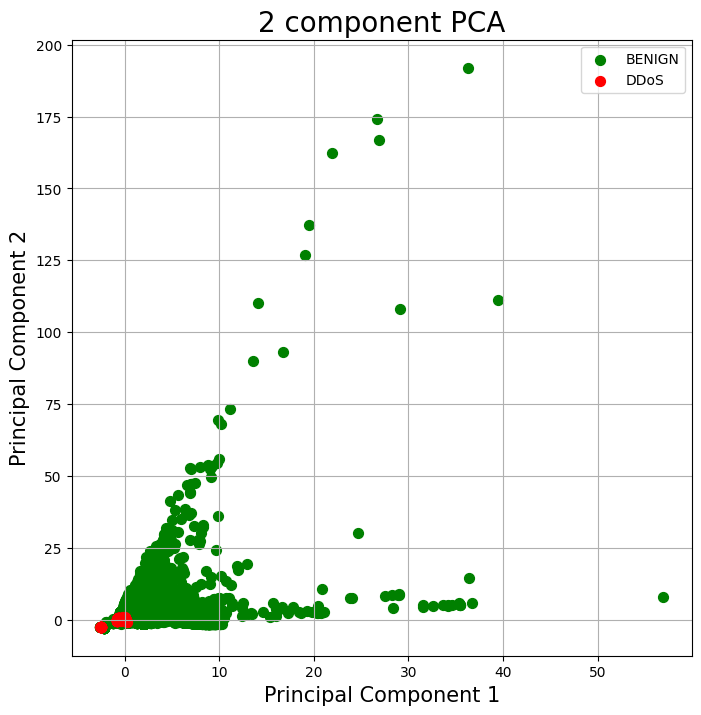

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20

targets = ['BENIGN', 'DDoS']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

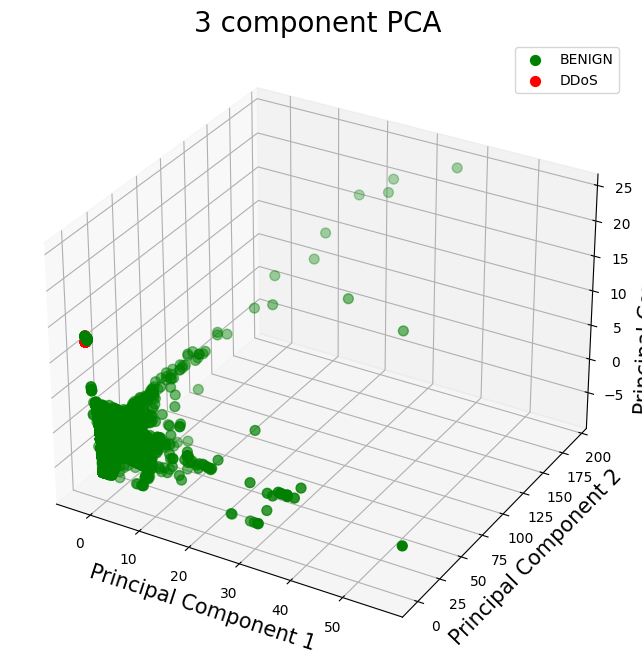

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separacja cech
x = df.loc[:, feature_names].values

# Separacja celu
y = df.loc[:, ['Label']].values

# Standaryzacja cech
x = StandardScaler().fit_transform(x)

# PCA Projection to 3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])

# Łączenie danych
finalDf = pd.concat([principalDf, df[['Label']]], axis=1)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize=20)

targets = ['BENIGN', 'DDoS']
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

plt.show()


In [ ]:
#Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [ ]:
#Evalueate LogisticRegression
# Obliczenie dokładności modelu
lr_accuracy = accuracy_score(y_test, lr_pred)

# Obliczenie wyniku F1 modelu Wynik F1 łączy precyzję i czułość
lr_f1 = f1_score(y_test, lr_pred)

# Obliczenie precyzji modelu
lr_precision = precision_score(y_test, lr_pred)

# Obliczenie czułości (recall) modelu
lr_recall = recall_score(y_test, lr_pred)

print('\nLogistic Regression:')
print(f'Accuracy: {lr_accuracy: .4f}')
print(f'F1 Score: {lr_f1: .4f}')
print(f'Precision: {lr_precision: .4f}')
print(f'Recall: {lr_recall: .4f}')


Logistic Regression:
Accuracy:  0.9401
F1 Score:  0.9493
Precision:  0.9123
Recall:  0.9895


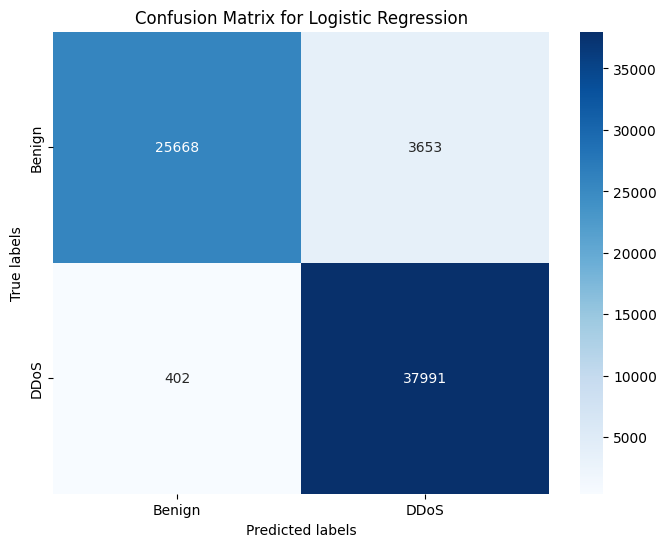

In [ ]:
#Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Confusion Matrix for Logistic Regression')

Wykorzystanie sieci neuronowej
1' normalizacja danych
2' dobór hiperparametrów

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler



#skalowanie danych/normalizacja Skaluje dane tak, aby miały średnią 0 i odchylenie standardowe 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


mlp = MLPClassifier(max_iter=2,random_state=42)

# Definiowanie zakresu hiperparametrów
param_grid = {
    'hidden_layer_sizes': [(10,5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant', 'adaptive']
}

# Konfiguracja GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

# Przeprowadzenie przeszukiwania siatki
grid_search.fit(X_train_scaled, y_train)

# Wyniki przeszukiwania i najlepsze hiperparametry
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Ocena najlepszego modelu na zbiorze testowym
best_mlp = grid_search.best_estimator_
test_score = best_mlp.score(X_test_scaled, y_test)
print(f"Test set score of best model: {test_score:.2f}")

# Konfiguracja RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=5, verbose=2, random_state=42)

# Przeprowadzenie przeszukiwania losowego
random_search.fit(X_train_scaled, y_train)

# Wyniki przeszukiwania i najlepsze hiperparametry
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.2f}")

# Ocena najlepszego modelu na zbiorze testowym
best_mlp = random_search.best_estimator_
test_score = best_mlp.score(X_test_scaled, y_test)
print(f"Test set score of best model: {test_score:.2f}")




Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 1.00
Test set score of best model: 1.00
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 5), 'alpha': 0.0001, 'activation': 'relu'}
Best cross-validation score: 1.00
Test set score of best model: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Inicjalizacja modelu sieci neuronowej
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10 ,random_state=42)
# Trenowanie modelu na danych treningowych
nn_model.fit(X_train, y_train)

# Przewidywanie klas dla danych testowych
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Obliczenie dokładności modelu
nn_accuracy = accuracy_score(y_test, nn_pred)

# Obliczenie wyniku F1 modelu
nn_f1 = f1_score(y_test, nn_pred)

# Obliczenie precyzji modelu
nn_precision = precision_score(y_test, nn_pred)

# Obliczenie czułości modelu
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network:')
print(f'Accuracy: {nn_accuracy: .4f}')
print(f'F1 Score: {nn_f1: .4f}')
print(f'Precision: {nn_precision: .4f}')
print(f'Recall: {nn_recall: .4f}')


Neural Network:
Accuracy:  0.9906
F1 Score:  0.9917
Precision:  0.9968
Recall:  0.9866


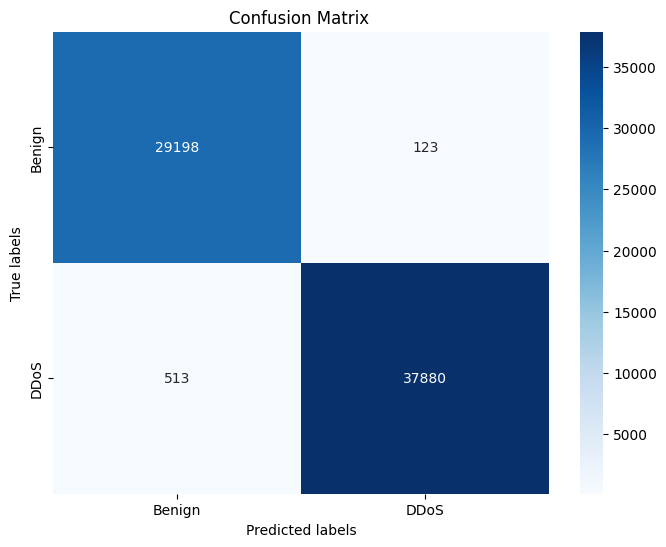

In [ ]:
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Confusion Matrix ')

In [ ]:
#Model Comparison

rf_proba = rf_model.predict_proba(X_test)

lr_proba = lr_model.predict_proba(X_test)

nn_proba = nn_model.predict_proba(X_test)

In [ ]:
#Combine predictions for ROC curve
#Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
fr_auc = auc(rf_fpr, rf_tpr)

#Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

#Calculate ROC curve for Random Forest
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


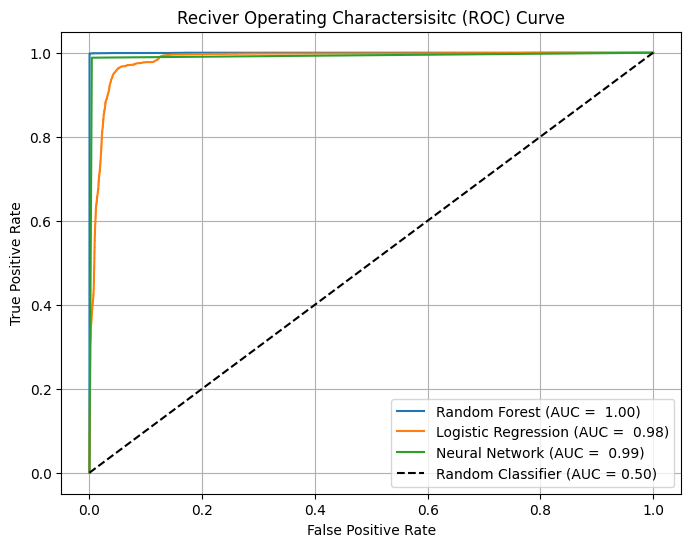

In [ ]:
#Plot ROC curves for all models

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {fr_auc: .2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc: .2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc: .2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver Operating Charactersisitc (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
